In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [2]:
import sys
# sys.path.append(r'C:\Users\Sommer Lab\Documents\Analysis Code')
import os
from scipy.optimize import curve_fit
from scipy.ndimage import rotate
from scipy.integrate import simpson

# from ImageAnalysis import ImageAnalysisCode
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
date = '9/15/2023'
# data_folder = r'/FLIR/odt align'

data_folder = ImageAnalysisCode.GetDataLocation(date)
t_exp = 10e-6
picturesPerIteration = 3
# t0 = 40e-6


rowstart = 0#243#450
rowend = -1#560
columnstart = 0#600
columnend = -1#900
#config = ImageAnalysisCode.LoadConfigFile(dataFolder = data_folder)
binsize=4

In [3]:
pwd

'C:\\Users\\Sommer Lab\\Documents\\Analysis Code\\Applications'

In [4]:
data_folder

'C:/Users/Sommer Lab/Documents/Data/2023/09-2023/15 Sep 2023'

In [5]:
cd C:/Users/Sommer Lab/Documents/Data/2023/09-2023/08 Sep 2023/Variable Logs

C:\Users\Sommer Lab\Documents\Data\2023\09-2023\08 Sep 2023\Variable Logs


In [6]:
filenames = os.listdir(data_folder+'/Variable Logs')

In [7]:
filenames.sort()

In [8]:
parameter_list = []

for filename in filenames:
    parameter_dict = {}
    parameter_dict['time'] = datetime.datetime.strptime(filename,'Variables_%Y_%m_%d_%H_%M_%S_0.txt')
#     print(parameter_dict['time'])
    with open( data_folder + '/Variable Logs/' + filename) as f:
        next(f)
        for line in f:
            key, val = line.strip().split(' = ')
            parameter_dict[key.replace(' ', '_')] = float(val)
            
    parameter_list.append(parameter_dict)

In [9]:
print(parameter_dict['time'])

2023-09-15 20:13:44


In [10]:
parameter_dict

{'time': datetime.datetime(2023, 9, 15, 20, 13, 44),
 'IterationNum': 20.0,
 'IterationCount': 21.0,
 'wait': 0.0,
 'AndorROIheight': 512.0,
 'AndorShortExpDelay_us': 2415.44,
 'LFImg': 3.598,
 'LF_AOM_freq': 226.0,
 'time_compress': 5.0,
 'MOT/Re_Attn_final_V': 4.0,
 'TOF': 0.0,
 'IR_1': 0.0,
 'tmod_ms': 0.0,
 'fmod_kHz': 0.0,
 'cMOT_coil': 0.45,
 'cMOT_dwell_ms': 2.0,
 'ZSBiasCurrent': 6.0,
 'CamBiasCurrent': 0.0,
 'VerticalBiasCurrent': 0.0,
 'ZSBiasVoltage': 1.44,
 'CamBiasVoltage': 0.322,
 'VerticalBiasVoltage': 0.377,
 'piezoX': 5.0,
 'piezoY': 5.0,
 'D1Time_ms': 1.5,
 'High_PD_1': 1.75,
 'High_PD_2': 0.25,
 'Evap_Time': 97.0,
 'Evap_Time_2': 50.0,
 'FLIR_Pulse': 20.0}

In [11]:
pd.DataFrame(parameter_list).set_index('time')

,IterationNum,IterationCount,wait,AndorROIheight,AndorShortExpDelay_us,LFImg,LF_AOM_freq,time_compress,MOT/Re_Attn_final_V,TOF,...,CamBiasVoltage,VerticalBiasVoltage,piezoX,piezoY,D1Time_ms,High_PD_1,High_PD_2,Evap_Time,Evap_Time_2,FLIR_Pulse
time,,,,,,,,,,,,,,,,,,,,,
2023-09-15 14:24:20,0.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2023-09-15 14:25:41,0.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2023-09-15 14:25:48,1.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.4675,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2023-09-15 14:25:55,2.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.5580,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2023-09-15 14:26:01,3.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.6485,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-15 20:13:17,16.0,21.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,97.0,50.0,16.0
2023-09-15 20:13:24,17.0,21.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,97.0,50.0,17.0
2023-09-15 20:13:30,18.0,21.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,97.0,50.0,18.0


In [12]:
parameter_Frame = pd.DataFrame(parameter_list)

In [13]:
parameter_Frame

,time,IterationNum,IterationCount,wait,AndorROIheight,AndorShortExpDelay_us,LFImg,LF_AOM_freq,time_compress,MOT/Re_Attn_final_V,...,CamBiasVoltage,VerticalBiasVoltage,piezoX,piezoY,D1Time_ms,High_PD_1,High_PD_2,Evap_Time,Evap_Time_2,FLIR_Pulse
0,2023-09-15 14:24:20,0.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
1,2023-09-15 14:25:41,0.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2,2023-09-15 14:25:48,1.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.4675,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
3,2023-09-15 14:25:55,2.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.5580,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
4,2023-09-15 14:26:01,3.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.6485,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2023-09-15 20:13:17,16.0,21.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,97.0,50.0,16.0
145,2023-09-15 20:13:24,17.0,21.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,97.0,50.0,17.0
146,2023-09-15 20:13:30,18.0,21.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,97.0,50.0,18.0
147,2023-09-15 20:13:37,19.0,21.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,97.0,50.0,19.0


In [16]:
parameter_Frame.set_index('time', inplace=True)

In [17]:
parameter_Frame

,IterationNum,IterationCount,wait,AndorROIheight,AndorShortExpDelay_us,LFImg,LF_AOM_freq,time_compress,MOT/Re_Attn_final_V,TOF,...,CamBiasVoltage,VerticalBiasVoltage,piezoX,piezoY,D1Time_ms,High_PD_1,High_PD_2,Evap_Time,Evap_Time_2,FLIR_Pulse
time,,,,,,,,,,,,,,,,,,,,,
2023-09-15 14:24:20,0.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2023-09-15 14:25:41,0.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2023-09-15 14:25:48,1.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.4675,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2023-09-15 14:25:55,2.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.5580,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2023-09-15 14:26:01,3.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.6485,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-15 20:13:17,16.0,21.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,97.0,50.0,16.0
2023-09-15 20:13:24,17.0,21.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,97.0,50.0,17.0
2023-09-15 20:13:30,18.0,21.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,97.0,50.0,18.0


In [34]:
parameter_Frame.iloc[0].aa = 3.14


In [56]:
parameter_Frame

,IterationNum,IterationCount,wait,AndorROIheight,AndorShortExpDelay_us,LFImg,LF_AOM_freq,time_compress,MOT/Re_Attn_final_V,TOF,...,CamBiasVoltage,VerticalBiasVoltage,piezoX,piezoY,D1Time_ms,High_PD_1,High_PD_2,Evap_Time,Evap_Time_2,FLIR_Pulse
time,,,,,,,,,,,,,,,,,,,,,
2023-09-15 14:24:20,3.14,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2023-09-15 14:25:41,0.00,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2023-09-15 14:25:48,1.00,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.4675,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2023-09-15 14:25:55,2.00,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.5580,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2023-09-15 14:26:01,3.00,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.6485,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-15 20:13:17,16.00,21.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,97.0,50.0,16.0
2023-09-15 20:13:24,17.00,21.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,97.0,50.0,17.0
2023-09-15 20:13:30,18.00,21.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,97.0,50.0,18.0


In [284]:
aa = parameter_Frame.head()[['IterationNum', 'wait', 'VerticalBiasVoltage', 'FLIR_Pulse']]
aa

,IterationNum,wait,VerticalBiasVoltage,FLIR_Pulse
time,,,,
2023-09-15 14:24:20,3.14,0.0,0.3770,NaN
2023-09-15 14:25:41,0.00,0.0,0.3770,NaN
2023-09-15 14:25:48,1.00,0.0,0.4675,NaN
2023-09-15 14:25:55,2.00,0.0,0.5580,NaN
2023-09-15 14:26:01,3.00,0.0,0.6485,NaN


In [285]:
bb = parameter_Frame.iloc[2:7][['piezoX', 'High_PD_1', 'wait']]
bb

,piezoX,High_PD_1,wait
time,,,
2023-09-15 14:25:48,5.0,1.75,0.0
2023-09-15 14:25:55,5.0,1.75,0.0
2023-09-15 14:26:01,5.0,1.75,0.0
2023-09-15 14:26:08,5.0,1.75,0.0
2023-09-15 14:26:15,5.0,1.75,0.0


In [289]:
take_smaller = lambda s1, s2: s1 if s1.sum() < s2.sum() else s2
aa.combine(bb, take_smaller)

,FLIR_Pulse,High_PD_1,IterationNum,VerticalBiasVoltage,piezoX,wait
time,,,,,,
2023-09-15 14:24:20,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-15 14:25:41,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-15 14:25:48,NaN,NaN,NaN,NaN,NaN,0.0
2023-09-15 14:25:55,NaN,NaN,NaN,NaN,NaN,0.0
2023-09-15 14:26:01,NaN,NaN,NaN,NaN,NaN,0.0
2023-09-15 14:26:08,NaN,NaN,NaN,NaN,NaN,0.0
2023-09-15 14:26:15,NaN,NaN,NaN,NaN,NaN,0.0


In [255]:
aa.merge(bb, 'outer')

,IterationNum,wait,VerticalBiasVoltage,FLIR_Pulse,piezoX,High_PD_1
0,3.14,0.0,0.3770,NaN,5.0,1.75
1,3.14,0.0,0.3770,NaN,5.0,1.75
2,3.14,0.0,0.3770,NaN,5.0,1.75
3,3.14,0.0,0.3770,NaN,5.0,1.75
4,3.14,0.0,0.3770,NaN,5.0,1.75
5,0.00,0.0,0.3770,NaN,5.0,1.75
6,0.00,0.0,0.3770,NaN,5.0,1.75
7,0.00,0.0,0.3770,NaN,5.0,1.75
8,0.00,0.0,0.3770,NaN,5.0,1.75
9,0.00,0.0,0.3770,NaN,5.0,1.75


In [250]:
cc = bb.join(bb, how='outer', lsuffix='_new')
cc

,piezoX_new,High_PD_1_new,piezoX,High_PD_1
time,,,,
2023-09-15 14:25:48,5.0,1.75,5.0,1.75
2023-09-15 14:25:55,5.0,1.75,5.0,1.75
2023-09-15 14:26:01,5.0,1.75,5.0,1.75
2023-09-15 14:26:08,5.0,1.75,5.0,1.75
2023-09-15 14:26:15,5.0,1.75,5.0,1.75


In [251]:
bb.join(cc, how='outer', lsuffix='_new')

,piezoX_new,High_PD_1_new,piezoX_new,High_PD_1_new,piezoX,High_PD_1
time,,,,,,
2023-09-15 14:25:48,5.0,1.75,5.0,1.75,5.0,1.75
2023-09-15 14:25:55,5.0,1.75,5.0,1.75,5.0,1.75
2023-09-15 14:26:01,5.0,1.75,5.0,1.75,5.0,1.75
2023-09-15 14:26:08,5.0,1.75,5.0,1.75,5.0,1.75
2023-09-15 14:26:15,5.0,1.75,5.0,1.75,5.0,1.75


In [106]:
aa.index.set_names('', inplace=True)

In [107]:
aa

,IterationNum,wait,VerticalBiasVoltage,FLIR_Pulse
,,,,
2023-09-15 14:24:20,3.14,0.0,0.3770,NaN
2023-09-15 14:25:41,0.00,0.0,0.3770,NaN
2023-09-15 14:25:48,1.00,0.0,0.4675,NaN
2023-09-15 14:25:55,2.00,0.0,0.5580,NaN
2023-09-15 14:26:01,3.00,0.0,0.6485,NaN


In [68]:
aa.iloc[0:4]

,IterationNum,wait,VerticalBiasVoltage,FLIR_Pulse
time,,,,
2023-09-15 14:24:20,3.14,0.0,0.3770,NaN
2023-09-15 14:25:41,0.00,0.0,0.3770,NaN
2023-09-15 14:25:48,1.00,0.0,0.4675,NaN
2023-09-15 14:25:55,2.00,0.0,0.5580,NaN


In [69]:
aa[0:4]

,IterationNum,wait,VerticalBiasVoltage,FLIR_Pulse
time,,,,
2023-09-15 14:24:20,3.14,0.0,0.3770,NaN
2023-09-15 14:25:41,0.00,0.0,0.3770,NaN
2023-09-15 14:25:48,1.00,0.0,0.4675,NaN
2023-09-15 14:25:55,2.00,0.0,0.5580,NaN


In [70]:
pd.DataFrame({'a': [1, 2, 3, 4]})

,a
0,1
1,2
2,3
3,4


In [36]:
parameter_Frame[parameter_Frame.time < datetime.datetime(2023, 9, 15, 18, 14, 8, 764070)]

,time,IterationNum,IterationCount,wait,AndorROIheight,AndorShortExpDelay_us,LFImg,LF_AOM_freq,time_compress,MOT/Re_Attn_final_V,...,CamBiasVoltage,VerticalBiasVoltage,piezoX,piezoY,D1Time_ms,High_PD_1,High_PD_2,Evap_Time,Evap_Time_2,FLIR_Pulse
0,2023-09-15 14:24:20,0.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
1,2023-09-15 14:25:41,0.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2,2023-09-15 14:25:48,1.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.4675,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
3,2023-09-15 14:25:55,2.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.5580,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
4,2023-09-15 14:26:01,3.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.6485,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2023-09-15 18:10:01,16.0,21.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,97.0,50.0,16.0
82,2023-09-15 18:10:07,17.0,21.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,97.0,50.0,17.0
83,2023-09-15 18:10:14,18.0,21.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,97.0,50.0,18.0
84,2023-09-15 18:10:21,19.0,21.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,97.0,50.0,19.0


In [29]:
Series = parameter_Frame[parameter_Frame.time < datetime.datetime(2023, 9, 15, 18, 14, 8, 764070)].iloc[-1]

In [30]:
Series.name

85

In [242]:
text = Series[['cMOT coil', 'VerticalBiasCurrent']]

Text(0.03, 0.98, 'cMOT coil              0.2\nVerticalBiasCurrent    1.0')

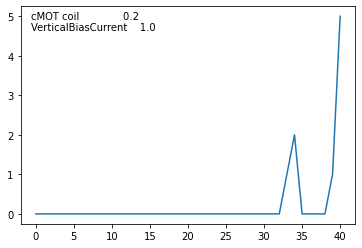

In [265]:
fig, ax = plt.subplots(1,1)

ax.plot(parameter_Frame.VerticalBiasCurrent)
ax.text(0.03,0.98, text.to_string(), ha='left', va='top', transform=ax.transAxes)

In [37]:
parameter_Frame.set_index('time')

,IterationNum,IterationCount,wait,AndorROIheight,AndorShortExpDelay_us,LFImg,LF_AOM_freq,time_compress,MOT/Re_Attn_final_V,TOF,...,CamBiasVoltage,VerticalBiasVoltage,piezoX,piezoY,D1Time_ms,High_PD_1,High_PD_2,Evap_Time,Evap_Time_2,FLIR_Pulse
time,,,,,,,,,,,,,,,,,,,,,
2023-09-15 14:24:20,0.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2023-09-15 14:25:41,0.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2023-09-15 14:25:48,1.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.4675,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2023-09-15 14:25:55,2.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.5580,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2023-09-15 14:26:01,3.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.6485,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-15 20:13:17,16.0,21.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,97.0,50.0,16.0
2023-09-15 20:13:24,17.0,21.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,97.0,50.0,17.0
2023-09-15 20:13:30,18.0,21.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,97.0,50.0,18.0


In [39]:
parameter_Frame.query('time <= datetime.datetime(2023, 9, 15, 16, 50, 46)')

,time,IterationNum,IterationCount,wait,AndorROIheight,AndorShortExpDelay_us,LFImg,LF_AOM_freq,time_compress,MOT/Re_Attn_final_V,...,CamBiasVoltage,VerticalBiasVoltage,piezoX,piezoY,D1Time_ms,High_PD_1,High_PD_2,Evap_Time,Evap_Time_2,FLIR_Pulse
0,2023-09-15 14:24:20,0.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
1,2023-09-15 14:25:41,0.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2,2023-09-15 14:25:48,1.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.4675,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
3,2023-09-15 14:25:55,2.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.5580,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
4,2023-09-15 14:26:01,3.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.6485,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
5,2023-09-15 14:26:08,4.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.7390,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
6,2023-09-15 14:26:15,5.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.8295,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
7,2023-09-15 14:26:21,6.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.9200,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
8,2023-09-15 14:40:24,0.0,6.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
9,2023-09-15 14:40:30,1.0,6.0,1.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN


In [191]:
parameter_Frame.time <= datetime.datetime(2023, 9, 8, 16, 50, 46)

0      True
1      True
2      True
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
Name: time, dtype: bool

In [65]:
def extractParameter(parameterName):
    return [ii[parameterName] for ii in parameter_list]

In [70]:
cMOTCoil = extractParameter('cMOT coil')
cMOTDwell_ms = extractParameter('cMOT dwell_ms')
ZSBiasI = extractParameter('ZSBiasCurrent')
CamBiasI = extractParameter('CamBiasCurrent')
VerticalBiasI = extractParameter('VerticalBiasCurrent')
ZSBiasV = extractParameter('ZSBiasVoltage')
CamBiasV = extractParameter('CamBiasVoltage')
VerticalBiasV = extractParameter('VerticalBiasVoltage')

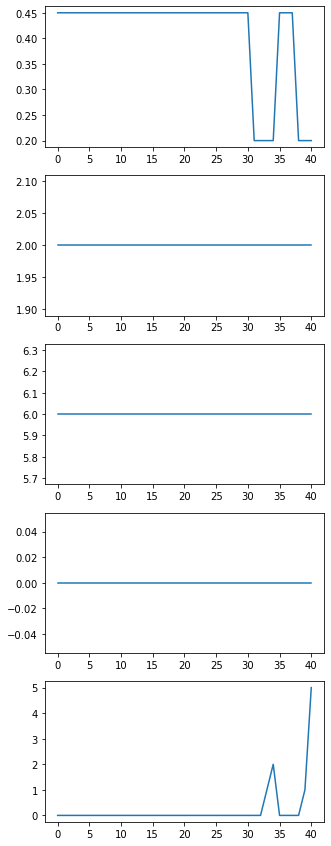

In [77]:
fig, axes = plt.subplots(5, 1, figsize=(5,15))

axes[0].plot(cMOTCoil)
axes[1].plot(cMOTDwell_ms)
axes[2].plot(ZSBiasI)
axes[3].plot(CamBiasI)
axes[4].plot(VerticalBiasI)
# axes[5].plot(ZSBiasV)
# axes[6].plot(CamBiasV)
# axes[7].plot(VerticalBiasV)

In [45]:
d = {}
with open("Variables_2023_09_12_13_58_15_0.txt") as f:
    next(f)
    for line in f:
        key, val = line.strip().split(' = ')
        d[key] = float(val)

In [79]:
d

{'IterationNum': 0.0,
 'IterationCount': 1.0,
 'wait': 0.0,
 'AndorROIheight': 512.0,
 'AndorShortExpDelay_us': 2415.44,
 'LFImg': 3.598,
 'LF_AOM_freq': 226.0,
 'time compress': 5.0,
 'MOT/Re Attn final V': 4.0,
 'TOF': 0.0,
 'IR_1': 0.0,
 'tmod_ms': 0.0,
 'fmod_kHz': 0.0,
 'cMOT coil': 0.2,
 'cMOT dwell_ms': 2.0,
 'ZSBiasCurrent': 6.0,
 'CamBiasCurrent': 0.0,
 'VerticalBiasCurrent': 5.0,
 'ZSBiasVoltage': 1.44,
 'CamBiasVoltage': 0.322,
 'VerticalBiasVoltage': 1.282,
 'piezoX': 5.0,
 'piezoY': 5.0,
 'D1Time_ms': 1.5,
 'High PD 1': 1.75,
 'High PD 2': 0.25,
 'Evap Time': 100.0,
 'Evap Time 2': 50.0}

In [83]:
type(parameter_Frame)

pandas.core.frame.DataFrame

<AxesSubplot:>

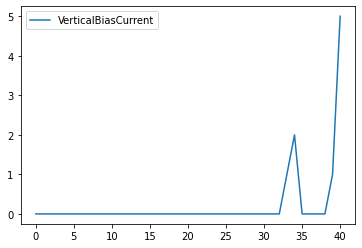

In [91]:
parameter_Frame.VerticalBiasCurrent.plot(legend=1)

<AxesSubplot:xlabel='time'>

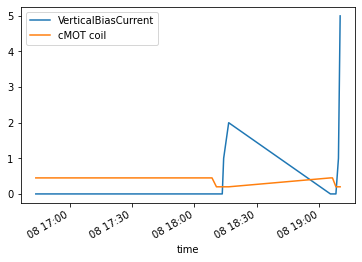

In [204]:
parameter_Frame.plot('time', ['VerticalBiasCurrent', 'cMOT coil'])

In [206]:
parameter_Frame.VerticalBiasCurrent

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    1.0
34    2.0
35    0.0
36    0.0
37    0.0
38    0.0
39    1.0
40    5.0
Name: VerticalBiasCurrent, dtype: float64

<AxesSubplot:>

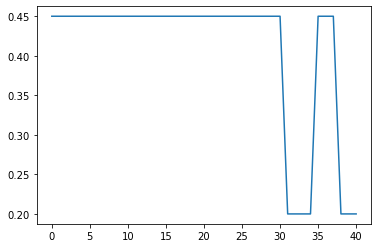

In [198]:
parameter_Frame['cMOT coil'].plot()

In [93]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4


In [19]:
mydict = {1:1, 2:3, 5:65}

In [23]:
mydict[5]

65

In [24]:
with open('myfile.txt', 'w') as f:
    print(mydict, file=f)


In [207]:
time.tim(os.path.getctime(r'Z:\ats317group\Data\2023\09-2023\08 Sep 2023\Andor\move cMOT\5000000000spool.dat'))

1694211248.7640698

In [214]:
datetime.datetime.fromtimestamp(1694211248.7640698)

datetime.datetime(2023, 9, 8, 18, 14, 8, 764070)

In [376]:
pd.Timestamp(1694211248.7640698, unit='s')

Timestamp('2023-09-08 22:14:08.764069796')

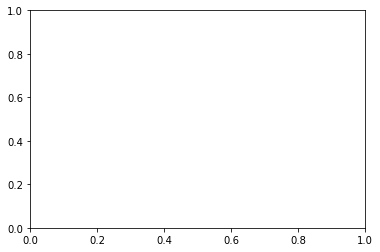

In [116]:
fig, axs = plt.subplots(1,1)

In [98]:
[3,4] == [3,4]

True

In [118]:
axsarray = np.array(axs)
axsarray

array(<AxesSubplot:>, dtype=object)

In [119]:
axsarray = np.array(axs)
axsarray

array(<AxesSubplot:>, dtype=object)

In [120]:
axsarray.shape

()

In [129]:
axsarray = axsarray.reshape([1, 1, -1])
axsarray

array([[[<AxesSubplot:>]]], dtype=object)

In [130]:
axsarray.shape

(1, 1, 1)

In [131]:
aa = np.array([2])

In [132]:
aa

array([2])

In [91]:
aa.shape

(1,)

In [67]:
axs[0]

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

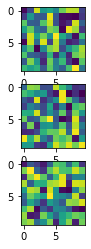

In [44]:
fig, axs = plt.subplots(3,1)

for ii in range(len(axs)):
    axs[ii].imshow(AA[ii])
#     plt.colorbar()
    
# plt.colorbar()

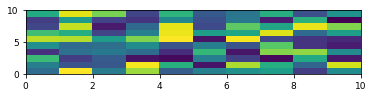

In [113]:
plt.subplot(3,1,1)
plt.pcolor(AA[0])

# plt.subplot(1,3,1)
# plt.pcolor(AA[1])

# plt.subplot(3,1,3)
# plt.pcolor(AA[2])

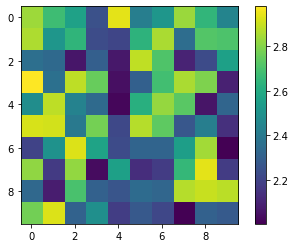

In [15]:
plt.imshow(AA[2])
plt.colorbar()

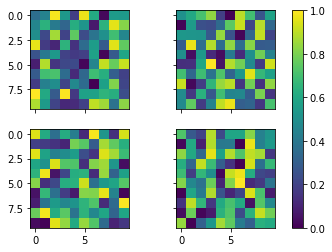

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
  
for ax in axes.flat:
    im = ax.imshow(np.random.random((10, 10)), vmin=0, vmax=1)
    
plt.colorbar(im, ax=axes.ravel().tolist())

In [23]:
axes.ravel().shape

(4,)

In [24]:
axes.flatten().shape

(4,)

In [26]:
ax=axes.ravel().tolist()

In [27]:
ax

[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]

In [29]:
AA = np.random.rand(2,3)
AA

array([[0.97169886, 0.65668476, 0.02688219],
       [0.64657241, 0.02991465, 0.72120143]])

In [32]:
type(AA.flat)

numpy.flatiter

In [36]:
AA.flatten().shape

(6,)

In [37]:
AA.ravel().shape

(6,)

In [16]:
np.random.randint?

In [5]:
aa = np.random.randint(1,50,10)
bb = np.random.randint(1,50,10)

In [6]:
aa

array([39,  3,  2, 41, 46, 28,  1,  9, 20, 11])

In [11]:
aa.median()

AttributeError: 'numpy.ndarray' object has no attribute 'median'

In [7]:
bb

array([ 7, 35, 49,  8, 26,  9, 14, 25, 26,  4])

In [22]:
grid = np.meshgrid(aa, bb)

In [23]:
grid

[array([[44,  8, 16, 15],
        [44,  8, 16, 15],
        [44,  8, 16, 15],
        [44,  8, 16, 15]]),
 array([[22, 22, 22, 22],
        [36, 36, 36, 36],
        [43, 43, 43, 43],
        [30, 30, 30, 30]])]

In [24]:
grid[0].ravel()

array([44,  8, 16, 15, 44,  8, 16, 15, 44,  8, 16, 15, 44,  8, 16, 15])

In [26]:
np.vstack( (grid[0].ravel(), grid[1].ravel()) )

array([[44,  8, 16, 15, 44,  8, 16, 15, 44,  8, 16, 15, 44,  8, 16, 15],
       [22, 22, 22, 22, 36, 36, 36, 36, 43, 43, 43, 43, 30, 30, 30, 30]])

In [34]:
np.ones_like(grid[0], dtype=bool)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [42]:
mask = np.full(aa.shape, True)
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [43]:
mask[3:-3] = False

In [44]:
mask

array([ True,  True,  True, False, False, False, False,  True,  True,
        True])

In [52]:
pp = np.polyfit(aa, bb, 3)
pp

array([-4.22144870e-04,  2.38517060e-02,  1.27482701e-01,  1.12902784e+01])

In [53]:
xx = np.arange(aa.min(), aa.max(), 0.1)
yy = pp[0] * xx**3 + pp[1] * xx**2 + pp[2] * xx + pp[3]

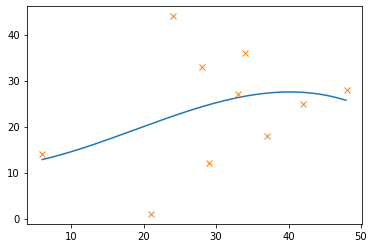

In [54]:
plt.plot(xx, yy, aa, bb, 'x')

In [55]:
aa

array([34, 24, 21, 28, 29, 42, 33, 48,  6, 37])

In [56]:
np.argmax(aa)

7

In [66]:
aa.max()/1.5

32.0

In [67]:
(aa < aa.max()/1.5).sum()

5

In [69]:
np.ptp(aa)

42

In [71]:
aa.ptp()

42

In [284]:
def LoadVariableLog(path):
    filenames = os.listdir(path)
    filenames.sort()
    
    variable_list = []
    
    for filename in filenames:
        variable_dict = {}
        variable_dict['time'] = datetime.datetime.strptime(filename, 'Variables_%Y_%m_%d_%H_%M_%S_0.txt')
        # print(parameter_dict['time'])
        with open( path + '/' + filename) as f:
            next(f)
            for line in f:
                key, val = line.strip().split(' = ')
                variable_dict[key] = float(val)
                
        variable_list.append(variable_dict)
        
        return pd.DataFrame(variable_list)

In [285]:
LoadVariableLog(data_folder+'/Variable Logs')

,time,IterationNum,IterationCount,wait,AndorROIheight,AndorShortExpDelay_us,LFImg,LF_AOM_freq,time compress,MOT/Re Attn final V,...,ZSBiasVoltage,CamBiasVoltage,VerticalBiasVoltage,piezoX,piezoY,D1Time_ms,High PD 1,High PD 2,Evap Time,Evap Time 2
0,2023-09-08 16:43:47,0.0,1.0,5.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0


In [269]:
aa = data_folder+'/Variable Logs'


In [272]:
bb = os.listdir(aa)

In [274]:
bb.sort()

In [275]:
bb

['Variables_2023_09_08_16_43_47_0.txt',
 'Variables_2023_09_08_16_45_48_0.txt',
 'Variables_2023_09_08_16_49_16_0.txt',
 'Variables_2023_09_08_16_50_46_0.txt',
 'Variables_2023_09_08_16_51_52_0.txt',
 'Variables_2023_09_08_17_05_57_0.txt',
 'Variables_2023_09_08_17_08_28_0.txt',
 'Variables_2023_09_08_17_09_58_0.txt',
 'Variables_2023_09_08_17_11_58_0.txt',
 'Variables_2023_09_08_17_13_10_0.txt',
 'Variables_2023_09_08_17_14_12_0.txt',
 'Variables_2023_09_08_17_15_05_0.txt',
 'Variables_2023_09_08_17_24_44_0.txt',
 'Variables_2023_09_08_17_24_51_0.txt',
 'Variables_2023_09_08_17_25_15_0.txt',
 'Variables_2023_09_08_17_25_22_0.txt',
 'Variables_2023_09_08_17_41_43_0.txt',
 'Variables_2023_09_08_17_42_45_0.txt',
 'Variables_2023_09_08_17_46_04_0.txt',
 'Variables_2023_09_08_17_46_11_0.txt',
 'Variables_2023_09_08_17_49_56_0.txt',
 'Variables_2023_09_08_17_50_03_0.txt',
 'Variables_2023_09_08_17_53_23_0.txt',
 'Variables_2023_09_08_17_53_30_0.txt',
 'Variables_2023_09_08_17_56_25_0.txt',


In [286]:
def LoadVariableLog(path):
    filenames = os.listdir(path)
    
    parameter_list = []

    for filename in filenames:
        parameter_dict = {}
        parameter_dict['time'] = datetime.datetime.strptime(filename,'Variables_%Y_%m_%d_%H_%M_%S_0.txt')
    #     print(parameter_dict['time'])
        with open( data_folder + '/Variable Logs/' + filename) as f:
            next(f)
            for line in f:
                key, val = line.strip().split(' = ')
                parameter_dict[key] = float(val)

        parameter_list.append(parameter_dict)
        
    return

In [288]:
LoadVariableLog(data_folder+'/Variable Logs')

In [293]:
os.path.join('a','b',None)

TypeError: join() argument must be str or bytes, not 'NoneType'

In [265]:
aa = parameter_Frame.head()
aa

,IterationNum,IterationCount,wait,AndorROIheight,AndorShortExpDelay_us,LFImg,LF_AOM_freq,time_compress,MOT/Re_Attn_final_V,TOF,...,CamBiasVoltage,VerticalBiasVoltage,piezoX,piezoY,D1Time_ms,High_PD_1,High_PD_2,Evap_Time,Evap_Time_2,FLIR_Pulse
time,,,,,,,,,,,,,,,,,,,,,
2023-09-15 14:24:20,3.14,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2023-09-15 14:25:41,0.00,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2023-09-15 14:25:48,1.00,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.4675,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2023-09-15 14:25:55,2.00,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.5580,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2023-09-15 14:26:01,3.00,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.6485,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN


In [266]:
bb = aa.set_index('time')
bb

KeyError: "None of ['time'] are in the columns"

In [320]:
type(aa.iloc[0].time)

pandas._libs.tslibs.timestamps.Timestamp

In [42]:
bb.index[0]

Timestamp('2023-09-15 14:24:20')

In [43]:
bb.iloc[0]

IterationNum                0.000
IterationCount              7.000
wait                        0.000
AndorROIheight            512.000
AndorShortExpDelay_us    2415.440
LFImg                       3.598
LF_AOM_freq               226.000
time_compress               5.000
MOT/Re_Attn_final_V         4.000
TOF                         0.000
IR_1                        0.000
tmod_ms                     0.000
fmod_kHz                    0.000
cMOT_coil                   0.200
cMOT_dwell_ms               2.000
ZSBiasCurrent               6.000
CamBiasCurrent              0.000
VerticalBiasCurrent         0.000
ZSBiasVoltage               1.440
CamBiasVoltage              0.322
VerticalBiasVoltage         0.377
piezoX                      5.000
piezoY                      5.000
D1Time_ms                   1.500
High_PD_1                   1.750
High_PD_2                   0.250
Evap_Time                 100.000
Evap_Time_2                50.000
FLIR_Pulse                    NaN
Name: 2023-09-

In [50]:
bbb = bb.loc[datetime.datetime(2023, 9, 15, 14, 24, 20)]
bbb

IterationNum                0.000
IterationCount              7.000
wait                        0.000
AndorROIheight            512.000
AndorShortExpDelay_us    2415.440
LFImg                       3.598
LF_AOM_freq               226.000
time_compress               5.000
MOT/Re_Attn_final_V         4.000
TOF                         0.000
IR_1                        0.000
tmod_ms                     0.000
fmod_kHz                    0.000
cMOT_coil                   0.200
cMOT_dwell_ms               2.000
ZSBiasCurrent               6.000
CamBiasCurrent              0.000
VerticalBiasCurrent         0.000
ZSBiasVoltage               1.440
CamBiasVoltage              0.322
VerticalBiasVoltage         0.377
piezoX                      5.000
piezoY                      5.000
D1Time_ms                   1.500
High_PD_1                   1.750
High_PD_2                   0.250
Evap_Time                 100.000
Evap_Time_2                50.000
FLIR_Pulse                    NaN
Name: 2023-09-

In [59]:
bbb.name - pd.Timestamp('2023-09-15 14:24:28')

Timedelta('-1 days +23:59:52')

In [64]:
bbb.name - datetime.datetime(2023, 9, 15, 14, 24, 28)

Timedelta('-1 days +23:59:52')

In [65]:
type(bbb.name - datetime.datetime(2023, 9, 15, 14, 24, 28))

pandas._libs.tslibs.timedeltas.Timedelta

In [69]:
(bbb.name - datetime.datetime(2023, 9, 15, 14, 24, 18)).total_seconds()

2.0

In [298]:
parameter_Frame.iloc[1]

time                     2023-09-08 16:45:48
IterationNum                             0.0
IterationCount                           1.0
wait                                     5.0
AndorROIheight                         512.0
AndorShortExpDelay_us                2415.44
LFImg                                  3.598
LF_AOM_freq                            226.0
time compress                            5.0
MOT/Re Attn final V                      4.0
TOF                                      0.0
IR_1                                     0.0
tmod_ms                                  0.0
fmod_kHz                                 0.0
cMOT coil                               0.45
cMOT dwell_ms                            2.0
ZSBiasCurrent                            6.0
CamBiasCurrent                           0.0
VerticalBiasCurrent                      0.0
ZSBiasVoltage                           1.44
CamBiasVoltage                         0.322
VerticalBiasVoltage                    0.377
piezoX    

In [326]:
filename

'Variables_2023_09_08_19_10_00_0.txt'

In [328]:
os.path.getctime(data_folder + '/Variable Logs/' + filename)

1694214600.6749604

In [352]:
datetime.datetime.fromtimestamp(1694191427)

datetime.datetime(2023, 9, 8, 12, 43, 47)

In [353]:
pd.Timestamp(1694191427, unit='s')

Timestamp('2023-09-08 16:43:47')

In [346]:
datetime.datetime.fromtimestamp(1694214600) == pd.Timestamp(1694214600, unit='s')

False

In [338]:
pd.Timestamp(os.path.getctime(data_folder + '/Variable Logs/' + filename), unit='s') == datetime.datetime(2023, 9, 8, 19, 10, 0, 674960)

False

In [350]:
bb.loc[pd.Timestamp('2023-09-08 16:43:47')]

IterationNum                0.000
IterationCount              1.000
wait                        5.000
AndorROIheight            512.000
AndorShortExpDelay_us    2415.440
LFImg                       3.598
LF_AOM_freq               226.000
time compress               5.000
MOT/Re Attn final V         4.000
TOF                         0.000
IR_1                        0.000
tmod_ms                     0.000
fmod_kHz                    0.000
cMOT coil                   0.450
cMOT dwell_ms               2.000
ZSBiasCurrent               6.000
CamBiasCurrent              0.000
VerticalBiasCurrent         0.000
ZSBiasVoltage               1.440
CamBiasVoltage              0.322
VerticalBiasVoltage         0.377
piezoX                      5.000
piezoY                      5.000
D1Time_ms                   1.500
High PD 1                   2.450
High PD 2                   0.250
Evap Time                 100.000
Evap Time 2                50.000
Name: 2023-09-08 16:43:47, dtype: float64

In [351]:
bb.loc[pd.Timestamp(1694191427, unit='s')]

IterationNum                0.000
IterationCount              1.000
wait                        5.000
AndorROIheight            512.000
AndorShortExpDelay_us    2415.440
LFImg                       3.598
LF_AOM_freq               226.000
time compress               5.000
MOT/Re Attn final V         4.000
TOF                         0.000
IR_1                        0.000
tmod_ms                     0.000
fmod_kHz                    0.000
cMOT coil                   0.450
cMOT dwell_ms               2.000
ZSBiasCurrent               6.000
CamBiasCurrent              0.000
VerticalBiasCurrent         0.000
ZSBiasVoltage               1.440
CamBiasVoltage              0.322
VerticalBiasVoltage         0.377
piezoX                      5.000
piezoY                      5.000
D1Time_ms                   1.500
High PD 1                   2.450
High PD 2                   0.250
Evap Time                 100.000
Evap Time 2                50.000
Name: 2023-09-08 16:43:47, dtype: float64

In [355]:
aa.time[0]

Timestamp('2023-09-08 16:43:47')

In [354]:
bb.loc[datetime.datetime.fromtimestamp(1694191427)]

KeyError: datetime.datetime(2023, 9, 8, 12, 43, 47)

In [ ]:
1694205827 1694191427

In [364]:
aa.time[0] > datetime.datetime.fromtimestamp(1694191427)

True

In [358]:
aa.time[0]

Timestamp('2023-09-08 16:43:47')

In [375]:
datetime.datetime.fromtimestamp(1694191427)

datetime.datetime(2023, 9, 8, 12, 43, 47)

In [374]:
aa.time[0]

Timestamp('2023-09-08 16:43:47')

In [371]:
pd.Timestamp(1694191427, unit='s')

Timestamp('2023-09-08 16:43:47')

In [384]:
pd.Timestamp(1694191427, unit='s') 

Timestamp('2023-09-08 16:43:47')

In [389]:
time(datetime.datetime.fromtimestamp(1694205827))

datetime.datetime

In [388]:
bb.loc[datetime.datetime.fromtimestamp(1694205827)]

IterationNum                0.000
IterationCount              1.000
wait                        5.000
AndorROIheight            512.000
AndorShortExpDelay_us    2415.440
LFImg                       3.598
LF_AOM_freq               226.000
time compress               5.000
MOT/Re Attn final V         4.000
TOF                         0.000
IR_1                        0.000
tmod_ms                     0.000
fmod_kHz                    0.000
cMOT coil                   0.450
cMOT dwell_ms               2.000
ZSBiasCurrent               6.000
CamBiasCurrent              0.000
VerticalBiasCurrent         0.000
ZSBiasVoltage               1.440
CamBiasVoltage              0.322
VerticalBiasVoltage         0.377
piezoX                      5.000
piezoY                      5.000
D1Time_ms                   1.500
High PD 1                   2.450
High PD 2                   0.250
Evap Time                 100.000
Evap Time 2                50.000
Name: 2023-09-08 16:43:47, dtype: float64

In [457]:
bb.iloc[3].wait = 3
bb

,IterationNum,IterationCount,wait,AndorROIheight,AndorShortExpDelay_us,LFImg,LF_AOM_freq,time compress,MOT/Re Attn final V,TOF,...,ZSBiasVoltage,CamBiasVoltage,VerticalBiasVoltage,piezoX,piezoY,D1Time_ms,High PD 1,High PD 2,Evap Time,Evap Time 2
time,,,,,,,,,,,,,,,,,,,,,
2023-09-08 16:43:47,0.0,1.0,5.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.00,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0
2023-09-08 16:45:48,0.0,1.0,5.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.00,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0
2023-09-08 16:49:16,0.0,1.0,5.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.00,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0
2023-09-08 16:50:46,0.0,1.0,3.0,512.0,2415.44,3.598,226.0,5.0,4.0,1.23,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0
2023-09-08 16:51:52,0.0,1.0,5.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.00,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0


In [463]:
bb.loc[ bb.index <= pd.Timestamp('2023-09-08 16:49:16') ]

,IterationNum,IterationCount,wait,AndorROIheight,AndorShortExpDelay_us,LFImg,LF_AOM_freq,time compress,MOT/Re Attn final V,TOF,...,ZSBiasVoltage,CamBiasVoltage,VerticalBiasVoltage,piezoX,piezoY,D1Time_ms,High PD 1,High PD 2,Evap Time,Evap Time 2
time,,,,,,,,,,,,,,,,,,,,,
2023-09-08 16:43:47,0.0,1.0,5.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0
2023-09-08 16:45:48,0.0,1.0,5.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0
2023-09-08 16:49:16,0.0,1.0,5.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0


In [467]:
bb[ bb.index <= bb.index[2] ]

,IterationNum,IterationCount,wait,AndorROIheight,AndorShortExpDelay_us,LFImg,LF_AOM_freq,time compress,MOT/Re Attn final V,TOF,...,ZSBiasVoltage,CamBiasVoltage,VerticalBiasVoltage,piezoX,piezoY,D1Time_ms,High PD 1,High PD 2,Evap Time,Evap Time 2
time,,,,,,,,,,,,,,,,,,,,,
2023-09-08 16:43:47,0.0,1.0,5.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0
2023-09-08 16:45:48,0.0,1.0,5.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0
2023-09-08 16:49:16,0.0,1.0,5.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0


In [458]:
bbb = bb[bb.wait==3]
bbb

,IterationNum,IterationCount,wait,AndorROIheight,AndorShortExpDelay_us,LFImg,LF_AOM_freq,time compress,MOT/Re Attn final V,TOF,...,ZSBiasVoltage,CamBiasVoltage,VerticalBiasVoltage,piezoX,piezoY,D1Time_ms,High PD 1,High PD 2,Evap Time,Evap Time 2
time,,,,,,,,,,,,,,,,,,,,,
2023-09-08 16:50:46,0.0,1.0,3.0,512.0,2415.44,3.598,226.0,5.0,4.0,1.23,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0


In [459]:
bbb['TOF'] = 3.21

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [461]:
bbb

,IterationNum,IterationCount,wait,AndorROIheight,AndorShortExpDelay_us,LFImg,LF_AOM_freq,time compress,MOT/Re Attn final V,TOF,...,ZSBiasVoltage,CamBiasVoltage,VerticalBiasVoltage,piezoX,piezoY,D1Time_ms,High PD 1,High PD 2,Evap Time,Evap Time 2
time,,,,,,,,,,,,,,,,,,,,,
2023-09-08 16:50:46,0.0,1.0,3.0,512.0,2415.44,3.598,226.0,5.0,4.0,3.21,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0


In [397]:
pd.Timestamp('2023-09-08 16:49:16')

Timestamp('2023-09-08 16:49:16')

In [396]:
bb.index

DatetimeIndex(['2023-09-08 16:43:47', '2023-09-08 16:45:48',
               '2023-09-08 16:49:16', '2023-09-08 16:50:46',
               '2023-09-08 16:51:52'],
              dtype='datetime64[ns]', name='time', freq=None)

In [398]:
bb.index < pd.Timestamp('2023-09-08 16:49:16')

array([ True,  True, False, False, False])

In [401]:
bb.filter.wait

AttributeError: 'function' object has no attribute 'wait'

In [402]:
record = {
  
 'Name': ['Ankit', 'Amit', 'Aishwarya', 'Priyanka', 'Priya', 'Shaurya' ],
 'Age': [21, 19, 20, 18, 17, 21],
 'Stream': ['Math', 'Commerce', 'Science', 'Math', 'Math', 'Science'],
 'Percentage': [88, 92, 95, 70, 65, 78] }

In [403]:
record

{'Name': ['Ankit', 'Amit', 'Aishwarya', 'Priyanka', 'Priya', 'Shaurya'],
 'Age': [21, 19, 20, 18, 17, 21],
 'Stream': ['Math', 'Commerce', 'Science', 'Math', 'Math', 'Science'],
 'Percentage': [88, 92, 95, 70, 65, 78]}

In [404]:
pd.DataFrame(record)

,Name,Age,Stream,Percentage
0,Ankit,21,Math,88
1,Amit,19,Commerce,92
2,Aishwarya,20,Science,95
3,Priyanka,18,Math,70
4,Priya,17,Math,65
5,Shaurya,21,Science,78


In [438]:
cc = pd.DataFrame(record, index=record['Name'], columns = ['Age', 'Stream', 'Percentage']) 
cc

,Age,Stream,Percentage
Ankit,21,Math,88
Amit,19,Commerce,92
Aishwarya,20,Science,95
Priyanka,18,Math,70
Priya,17,Math,65
Shaurya,21,Science,78


In [431]:
cc.index.name = None

In [432]:
cc

,Age,Stream,Percentage
Ankit,21,Math,88
Amit,19,Commerce,92
Aishwarya,20,Science,95
Priyanka,18,Math,70
Priya,17,Math,65
Shaurya,21,Science,78


In [445]:
cc.rename_axis('qwer', inplace=True)
cc

,Age,Stream,Percentage
qwer,,,
Ankit,21,Math,88
Amit,19,Commerce,92
Aishwarya,20,Science,95
Priyanka,18,Math,70
Priya,17,Math,65
Shaurya,21,Science,78


In [443]:
cc

,Age,Stream,Percentage
asdf,,,
Ankit,21,Math,88
Amit,19,Commerce,92
Aishwarya,20,Science,95
Priyanka,18,Math,70
Priya,17,Math,65
Shaurya,21,Science,78


In [437]:
cc.rename_axis?

In [468]:
bb

,IterationNum,IterationCount,wait,AndorROIheight,AndorShortExpDelay_us,LFImg,LF_AOM_freq,time compress,MOT/Re Attn final V,TOF,...,ZSBiasVoltage,CamBiasVoltage,VerticalBiasVoltage,piezoX,piezoY,D1Time_ms,High PD 1,High PD 2,Evap Time,Evap Time 2
time,,,,,,,,,,,,,,,,,,,,,
2023-09-08 16:43:47,0.0,1.0,5.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.00,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0
2023-09-08 16:45:48,0.0,1.0,5.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.00,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0
2023-09-08 16:49:16,0.0,1.0,5.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.00,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0
2023-09-08 16:50:46,0.0,1.0,3.0,512.0,2415.44,3.598,226.0,5.0,4.0,1.23,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0
2023-09-08 16:51:52,0.0,1.0,5.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.00,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0


In [470]:
bb.iloc[3].wait < 4 and bb.iloc[3].TOF > 1

True

In [471]:
bb.index[3]

Timestamp('2023-09-08 16:50:46')

In [486]:
bbb = bb[ bb.index <= bb.index[3] ].iloc[-1]
bbb

IterationNum                0.000
IterationCount              1.000
wait                        3.000
AndorROIheight            512.000
AndorShortExpDelay_us    2415.440
LFImg                       3.598
LF_AOM_freq               226.000
time compress               5.000
MOT/Re Attn final V         4.000
TOF                         1.230
IR_1                        0.000
tmod_ms                     0.000
fmod_kHz                    0.000
cMOT coil                   0.450
cMOT dwell_ms               2.000
ZSBiasCurrent               6.000
CamBiasCurrent              0.000
VerticalBiasCurrent         0.000
ZSBiasVoltage               1.440
CamBiasVoltage              0.322
VerticalBiasVoltage         0.377
piezoX                      5.000
piezoY                      5.000
D1Time_ms                   1.500
High PD 1                   2.450
High PD 2                   0.250
Evap Time                 100.000
Evap Time 2                50.000
Name: 2023-09-08 16:50:46, dtype: float64

In [485]:
bb[ bb.index <= bb.index[3] ].iloc[-1].name

Timestamp('2023-09-08 16:50:46')

In [488]:
bbb['wait'] < 4

True

In [492]:
dd = [1,1,1,1]
[ ii==1 for ii in dd ]

[True, True, True, True]

In [493]:
all([ ii==1 for ii in dd ])

True

In [494]:
'wait time'.replace(' ', '_')

'wait_time'

In [530]:
ee = [ eval( 'bbb.'+ii ) for ii in Filter ]

In [531]:
ee

[True, False, True]

In [532]:
[ eval( 'bbb.'+ii ) for ii in Filter ]

[True, False, True]

In [502]:
Filter = [ 'wait<4', 'TOF>2', 'TOF<32' ]

In [526]:
iiter = iter(range(12))

for ii in iiter:
    print(ii)
    if ii%3 == 0:
        next(iiter)
        next(iiter)
        next(iiter)
        continue
    print(ii,'\n')

0
4
4 

5
5 

6
10
10 

11
11 



In [506]:
3%3

0

In [535]:
def fun(a):
    b = a**2
    c = None
    return b, c

In [536]:
fun(2)

(4, None)

In [541]:
aa = [1,2,3,4]
aa

[1, 2, 3, 4]

In [542]:
aa[1] = datetime.datetime(2012,2,1)

In [543]:
aa 

[1, datetime.datetime(2012, 2, 1, 0, 0), 3, 4]

In [546]:
for a in aa:
    print(a)
    a = 8
    print(a)

1
8
2012-02-01 00:00:00
8
3
8
4
8


In [549]:
aa

[1, datetime.datetime(2012, 2, 1, 0, 0), 3, 4]

In [548]:
for ii, a in enumerate(aa):
    print(ii)

0
1
2
3


In [561]:
aa

[1, datetime.datetime(2012, 2, 1, 0, 0), 3, 4]

In [567]:
aa[None:np.nan]

TypeError: slice indices must be integers or None or have an __index__ method

In [564]:
5+None

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [566]:
3*np.nan

nan

In [568]:
aa = 2
aa

2

In [571]:
aa *= 3

In [572]:
aa

18

In [573]:
bb

,IterationNum,IterationCount,wait,AndorROIheight,AndorShortExpDelay_us,LFImg,LF_AOM_freq,time compress,MOT/Re Attn final V,TOF,...,ZSBiasVoltage,CamBiasVoltage,VerticalBiasVoltage,piezoX,piezoY,D1Time_ms,High PD 1,High PD 2,Evap Time,Evap Time 2
time,,,,,,,,,,,,,,,,,,,,,
2023-09-08 16:43:47,0.0,1.0,5.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.00,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0
2023-09-08 16:45:48,0.0,1.0,5.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.00,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0
2023-09-08 16:49:16,0.0,1.0,5.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.00,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0
2023-09-08 16:50:46,0.0,1.0,3.0,512.0,2415.44,3.598,226.0,5.0,4.0,1.23,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0
2023-09-08 16:51:52,0.0,1.0,5.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.00,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0


In [582]:
bbb[['wait', 'TOF']].name.to_string()

Index(['wait', 'TOF'], dtype='object')

In [599]:
bbb[['wait', 'TOF']].to_string(header=0)

'wait    3.00\nTOF     1.23'

In [593]:
bbb[['wait', 'TOF']].to_string(name = 1)

'wait    3.00\nTOF     1.23\nName: 2023-09-08 16:50:46'

In [597]:
bbb

IterationNum                0.000
IterationCount              1.000
wait                        3.000
AndorROIheight            512.000
AndorShortExpDelay_us    2415.440
LFImg                       3.598
LF_AOM_freq               226.000
time compress               5.000
MOT/Re Attn final V         4.000
TOF                         1.230
IR_1                        0.000
tmod_ms                     0.000
fmod_kHz                    0.000
cMOT coil                   0.450
cMOT dwell_ms               2.000
ZSBiasCurrent               6.000
CamBiasCurrent              0.000
VerticalBiasCurrent         0.000
ZSBiasVoltage               1.440
CamBiasVoltage              0.322
VerticalBiasVoltage         0.377
piezoX                      5.000
piezoY                      5.000
D1Time_ms                   1.500
High PD 1                   2.450
High PD 2                   0.250
Evap Time                 100.000
Evap Time 2                50.000
Name: 2023-09-08 16:50:46, dtype: float64

In [586]:
bb

,IterationNum,IterationCount,wait,AndorROIheight,AndorShortExpDelay_us,LFImg,LF_AOM_freq,time compress,MOT/Re Attn final V,TOF,...,ZSBiasVoltage,CamBiasVoltage,VerticalBiasVoltage,piezoX,piezoY,D1Time_ms,High PD 1,High PD 2,Evap Time,Evap Time 2
time,,,,,,,,,,,,,,,,,,,,,
2023-09-08 16:43:47,0.0,1.0,5.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.00,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0
2023-09-08 16:45:48,0.0,1.0,5.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.00,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0
2023-09-08 16:49:16,0.0,1.0,5.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.00,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0
2023-09-08 16:50:46,0.0,1.0,3.0,512.0,2415.44,3.598,226.0,5.0,4.0,1.23,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0
2023-09-08 16:51:52,0.0,1.0,5.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.00,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0


In [587]:
bbb

IterationNum                0.000
IterationCount              1.000
wait                        3.000
AndorROIheight            512.000
AndorShortExpDelay_us    2415.440
LFImg                       3.598
LF_AOM_freq               226.000
time compress               5.000
MOT/Re Attn final V         4.000
TOF                         1.230
IR_1                        0.000
tmod_ms                     0.000
fmod_kHz                    0.000
cMOT coil                   0.450
cMOT dwell_ms               2.000
ZSBiasCurrent               6.000
CamBiasCurrent              0.000
VerticalBiasCurrent         0.000
ZSBiasVoltage               1.440
CamBiasVoltage              0.322
VerticalBiasVoltage         0.377
piezoX                      5.000
piezoY                      5.000
D1Time_ms                   1.500
High PD 1                   2.450
High PD 2                   0.250
Evap Time                 100.000
Evap Time 2                50.000
Name: 2023-09-08 16:50:46, dtype: float64

In [591]:
bbb.to_string()

'IterationNum                0.000\nIterationCount              1.000\nwait                        3.000\nAndorROIheight            512.000\nAndorShortExpDelay_us    2415.440\nLFImg                       3.598\nLF_AOM_freq               226.000\ntime compress               5.000\nMOT/Re Attn final V         4.000\nTOF                         1.230\nIR_1                        0.000\ntmod_ms                     0.000\nfmod_kHz                    0.000\ncMOT coil                   0.450\ncMOT dwell_ms               2.000\nZSBiasCurrent               6.000\nCamBiasCurrent              0.000\nVerticalBiasCurrent         0.000\nZSBiasVoltage               1.440\nCamBiasVoltage              0.322\nVerticalBiasVoltage         0.377\npiezoX                      5.000\npiezoY                      5.000\nD1Time_ms                   1.500\nHigh PD 1                   2.450\nHigh PD 2                   0.250\nEvap Time                 100.000\nEvap Time 2                50.000'

In [600]:
asdf = [1,2,3,4]

In [606]:
asdf[-25:None]

[1, 2, 3, 4]

In [121]:
os.path.getctime(r'C:\Users\Sommer Lab\Documents\Data\2023\09-2023\26 Sep 2023\Variable Logs\Variables_2023_09_26_12_22_41_0.txt')

1695745361.3811476

In [136]:
datetime.datetime.fromtimestamp( round(
os.path.getctime(r'C:\Users\Sommer Lab\Documents\Data\2023\09-2023\26 Sep 2023\Variable Logs\Variables_2023_09_26_12_22_41_0.txt'), 2))

datetime.datetime(2023, 9, 26, 12, 22, 41, 380000)

In [124]:
pd.Timestamp(datetime.datetime(2023, 9, 26, 12, 22, 41, 381148))

Timestamp('2023-09-26 12:22:41.381148')

In [160]:
t1 = pd.to_datetime(round(1695745361.3711476), unit='s')
t1

Timestamp('2023-09-26 16:22:41')

In [161]:
t2 = pd.to_datetime(round(1695745361.4911499), unit='s')
t2

Timestamp('2023-09-26 16:22:41')

In [162]:
t1==t2

True

In [269]:
readLog = pd.read_csv('C:\\Users\\Sommer Lab\\Documents\\Data\\2023/09-2023/26 Sep 2023\\asdfasdf.csv')

In [270]:
readLog

,time,IterationNum,IterationCount,wait,AndorROIheight,AndorShortExpDelay_us,LFImg,LF_AOM_freq,time_compress,MOT/Re_Attn_final_V,...,CamBiasVoltage,VerticalBiasVoltage,piezoX,piezoY,D1Time_ms,High_PD_1,High_PD_2,Evap_Time,Evap_Time_2,FLIR_Pulse
0,2023-09-26 12:07:23.520,0.0,1.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.377,5.0,5.0,1.5,1.75,0.25,97.0,50.0,20.0
1,2023-09-26 12:14:23.510,0.0,1.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.377,5.0,5.0,1.5,1.75,0.25,97.0,50.0,20.0
2,2023-09-26 12:22:41.380,0.0,1.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.377,5.0,5.0,1.5,1.75,0.25,97.0,50.0,20.0
3,2023-09-26 12:27:51.560,0.0,1.0,0.5,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.377,5.0,5.0,1.5,NaN,NaN,NaN,NaN,NaN
4,2023-09-26 12:28:05.740,0.0,1.0,0.5,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.377,5.0,5.0,1.5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2023-09-26 18:40:22.210,0.0,1.0,0.5,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.739,5.0,5.0,1.5,NaN,NaN,NaN,NaN,20.0
164,2023-09-26 18:40:53.360,0.0,1.0,0.5,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.739,5.0,5.0,1.5,NaN,NaN,NaN,NaN,20.0
165,2023-09-26 18:41:19.480,0.0,1.0,0.5,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.739,5.0,5.0,1.5,NaN,NaN,NaN,NaN,20.0
166,2023-09-26 18:41:42.780,0.0,1.0,0.5,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.739,5.0,5.0,1.5,NaN,NaN,NaN,NaN,20.0


In [275]:
readLog.time = pd.to_datetime(readLog.time)

In [276]:
readLog

,time,IterationNum,IterationCount,wait,AndorROIheight,AndorShortExpDelay_us,LFImg,LF_AOM_freq,time_compress,MOT/Re_Attn_final_V,...,CamBiasVoltage,VerticalBiasVoltage,piezoX,piezoY,D1Time_ms,High_PD_1,High_PD_2,Evap_Time,Evap_Time_2,FLIR_Pulse
0,2023-09-26 12:07:23.520,0.0,1.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.377,5.0,5.0,1.5,1.75,0.25,97.0,50.0,20.0
1,2023-09-26 12:14:23.510,0.0,1.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.377,5.0,5.0,1.5,1.75,0.25,97.0,50.0,20.0
2,2023-09-26 12:22:41.380,0.0,1.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.377,5.0,5.0,1.5,1.75,0.25,97.0,50.0,20.0
3,2023-09-26 12:27:51.560,0.0,1.0,0.5,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.377,5.0,5.0,1.5,NaN,NaN,NaN,NaN,NaN
4,2023-09-26 12:28:05.740,0.0,1.0,0.5,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.377,5.0,5.0,1.5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2023-09-26 18:40:22.210,0.0,1.0,0.5,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.739,5.0,5.0,1.5,NaN,NaN,NaN,NaN,20.0
164,2023-09-26 18:40:53.360,0.0,1.0,0.5,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.739,5.0,5.0,1.5,NaN,NaN,NaN,NaN,20.0
165,2023-09-26 18:41:19.480,0.0,1.0,0.5,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.739,5.0,5.0,1.5,NaN,NaN,NaN,NaN,20.0
166,2023-09-26 18:41:42.780,0.0,1.0,0.5,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.739,5.0,5.0,1.5,NaN,NaN,NaN,NaN,20.0


In [277]:
readLog.set_index('time', inplace=True)

In [279]:
readLog.index[0]

Timestamp('2023-09-26 12:07:23.520000')

In [268]:
pd.Timestamp(readLog.index[0])

Timestamp('2023-09-26 12:07:23.520000')

In [267]:
aa.index[0]

Timestamp('2023-09-15 14:24:20')

In [177]:
str(Num).lower() == 'all'

False

In [178]:
a =1
b = 3

In [181]:
aa.index[0]

Timestamp('2023-09-15 14:24:20')

In [184]:
data = [[aa.index[0], 1, 3, 5], [aa.index[3], 7, 1, 9]]
data

[[Timestamp('2023-09-15 14:24:20'), 1, 3, 5],
 [Timestamp('2023-09-15 14:25:55'), 7, 1, 9]]

In [185]:
pd.DataFrame(data)

,0,1,2,3
0,2023-09-15 14:24:20,1,3,5
1,2023-09-15 14:25:55,7,1,9


In [193]:
df = pd.DataFrame(data, columns=['time', 'x', 'y', 'z'])
df

,time,x,y,z
0,2023-09-15 14:24:20,1,3,5
1,2023-09-15 14:25:55,7,1,9


In [227]:
timelist = [aa.index[ii] for ii in range(5)]
timelist

[Timestamp('2023-09-15 14:24:20'),
 Timestamp('2023-09-15 14:25:41'),
 Timestamp('2023-09-15 14:25:48'),
 Timestamp('2023-09-15 14:25:55'),
 Timestamp('2023-09-15 14:26:01')]

In [226]:
timelist1 = [[timelist[ii], ii**2] for ii in range(4)]
# timelist1 = timelist1 + [timelist[-1]]
timelist1

[[Timestamp('2023-09-15 14:24:20'), 0],
 [Timestamp('2023-09-15 14:25:41'), 1],
 [Timestamp('2023-09-15 14:25:48'), 4],
 [Timestamp('2023-09-15 14:25:55'), 9]]

In [238]:
pd.DataFrame( np.array([[1,2,3,4,5], [3,2,1,5,1]]).T, timelist)

,0,1
2023-09-15 14:24:20,1,3
2023-09-15 14:25:41,2,2
2023-09-15 14:25:48,3,1
2023-09-15 14:25:55,4,5
2023-09-15 14:26:01,5,1


In [237]:
np.array([[1,2,3,4,5], [3,2,1,5,1]]).T

array([[1, 3],
       [2, 2],
       [3, 1],
       [4, 5],
       [5, 1]])

In [209]:
timelist[2] = [timelist[2], 1]

In [210]:
timelist

[[Timestamp('2023-09-15 14:24:20'), 1],
 Timestamp('2023-09-15 14:25:41'),
 [Timestamp('2023-09-15 14:25:48'), 1],
 Timestamp('2023-09-15 14:25:55'),
 Timestamp('2023-09-15 14:26:01')]

In [223]:
dict(timelist1)

{Timestamp('2023-09-15 14:24:20'): 0,
 Timestamp('2023-09-15 14:25:41'): 1,
 Timestamp('2023-09-15 14:25:48'): 4,
 Timestamp('2023-09-15 14:25:55'): 9}

In [126]:
array = np.arange(30).reshape(6,5)
array

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29]])

In [153]:
df = pd.DataFrame(array, columns = ['A', 'B', 'C', 'D', 'E'], index = ['a', 'b','c','d','e','f'])
df.index.set_names('ind', inplace=True)
df

,A,B,C,D,E
ind,,,,,
a,0,1,2,3,4
b,5,6,7,8,9
c,10,11,12,13,14
d,15,16,17,18,19
e,20,21,22,23,24
f,25,26,27,28,29


In [195]:
df1 = df.iloc[0:-1, 0:-1].copy()
df2 = df.iloc[1:, 1:].copy()
df3 = df2.copy()
df3.B[0]=99
df1

,A,B,C,D
ind,,,,
a,0,1,2,3
b,5,6,7,8
c,10,11,12,13
d,15,16,17,18
e,20,21,22,23


In [196]:
df2

,B,C,D,E
ind,,,,
b,6,7,8,9
c,11,12,13,14
d,16,17,18,19
e,21,22,23,24
f,26,27,28,29


In [197]:
df3.C[1]=7
df3

,B,C,D,E
ind,,,,
b,99,7,8,9
c,11,7,13,14
d,16,17,18,19
e,21,22,23,24
f,26,27,28,29


In [166]:
df1.join(df2, how='outer', lsuffix='L')

,A,BL,CL,DL,B,C,D,E
ind,,,,,,,,
a,0.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN
b,5.0,6.0,7.0,8.0,6.0,7.0,8.0,9.0
c,10.0,11.0,12.0,13.0,11.0,12.0,13.0,14.0
d,15.0,16.0,17.0,18.0,16.0,17.0,18.0,19.0
e,20.0,21.0,22.0,23.0,21.0,22.0,23.0,24.0
f,NaN,NaN,NaN,NaN,26.0,27.0,28.0,29.0


In [158]:
df1.merge(df3, how='outer')

,A,B,C,D,E
0,0.0,1,2,3,NaN
1,5.0,6,7,8,NaN
2,10.0,11,12,13,14.0
3,15.0,16,17,18,19.0
4,20.0,21,22,23,24.0
5,NaN,99,7,8,9.0
6,NaN,26,27,28,29.0


In [164]:
df1.merge(df3, how='outer', on='C')

,A,B_x,C,D_x,B_y,D_y,E
0,0.0,1.0,2,3.0,NaN,NaN,NaN
1,5.0,6.0,7,8.0,99.0,8.0,9.0
2,5.0,6.0,7,8.0,11.0,13.0,14.0
3,10.0,11.0,12,13.0,NaN,NaN,NaN
4,15.0,16.0,17,18.0,16.0,18.0,19.0
5,20.0,21.0,22,23.0,21.0,23.0,24.0
6,NaN,NaN,27,NaN,26.0,28.0,29.0


In [132]:
df2

,A,B,C,D,E
a,0,1,2,3,4
b,5,6,7,8,9
c,10,11,12,13,14
d,15,16,17,18,19
e,20,21,22,23,24
f,25,26,27,28,29


In [97]:
df.insert(2, "Age", [21, 23, 24, 21, 34,11])

In [91]:
df

,A,B,Age,C,D,E
a,0,1,21,2,3,4
b,5,6,23,7,8,9
c,10,11,24,12,13,14
d,15,16,21,17,18,19
e,20,21,34,22,23,24
f,25,26,11,27,28,29


In [67]:
df.drop('Age', axis=1)

,B,C,D,E
A,,,,
0,1,2,3,4
5,6,7,8,9
10,11,12,13,14
15,16,17,18,19
20,21,22,23,24
25,26,27,28,29


In [167]:
df

,A,B,C,D,E
ind,,,,,
a,0,1,2,3,4
b,5,6,7,8,9
c,10,11,12,13,14
d,15,16,17,18,19
e,20,21,22,23,24
f,25,26,27,28,29


In [170]:
df.drop(['A','B'], axis=1)

,C,D,E
ind,,,
a,2,3,4
b,7,8,9
c,12,13,14
d,17,18,19
e,22,23,24
f,27,28,29


In [192]:
df

,A,B,C,D,E
ind,,,,,
a,0,1,2,3,4
b,5,6,7,8,9
c,10,11,12,13,14
d,15,16,17,18,19
e,20,21,22,23,24
f,25,26,27,28,29


In [193]:
df1

,A,B,C,D
ind,,,,
a,0,1,2,3
b,5,6,7,8
c,10,11,12,13
d,15,16,17,18
e,20,21,22,23


In [198]:
df2

,B,C,D,E
ind,,,,
b,6,7,8,9
c,11,12,13,14
d,16,17,18,19
e,21,22,23,24
f,26,27,28,29


In [174]:
df1.merge(df2, how='outer', left_index=True, right_index=True)


,A,B_x,C_x,D_x,B_y,C_y,D_y,E
ind,,,,,,,,
a,0.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN
b,5.0,6.0,7.0,8.0,6.0,7.0,8.0,9.0
c,10.0,11.0,12.0,13.0,11.0,12.0,13.0,14.0
d,15.0,16.0,17.0,18.0,16.0,17.0,18.0,19.0
e,20.0,21.0,22.0,23.0,21.0,22.0,23.0,24.0
f,NaN,NaN,NaN,NaN,26.0,27.0,28.0,29.0


In [175]:
df1.merge(df2, how='outer', on='ind')


,A,B_x,C_x,D_x,B_y,C_y,D_y,E
ind,,,,,,,,
a,0.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN
b,5.0,6.0,7.0,8.0,6.0,7.0,8.0,9.0
c,10.0,11.0,12.0,13.0,11.0,12.0,13.0,14.0
d,15.0,16.0,17.0,18.0,16.0,17.0,18.0,19.0
e,20.0,21.0,22.0,23.0,21.0,22.0,23.0,24.0
f,NaN,NaN,NaN,NaN,26.0,27.0,28.0,29.0


In [179]:
df1.join(df2, how='outer', lsuffix='_L')

,A,B_L,C_L,D_L,B,C,D,E
ind,,,,,,,,
a,0.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN
b,5.0,6.0,7.0,8.0,6.0,7.0,8.0,9.0
c,10.0,11.0,12.0,13.0,11.0,12.0,13.0,14.0
d,15.0,16.0,17.0,18.0,16.0,17.0,18.0,19.0
e,20.0,21.0,22.0,23.0,21.0,22.0,23.0,24.0
f,NaN,NaN,NaN,NaN,26.0,27.0,28.0,29.0


In [183]:
df1

,A,B,C,D
ind,,,,
a,0,1,2,3
b,5,6,7,8
c,10,11,12,13
d,15,16,17,18
e,20,21,22,23


In [184]:
df2

,B,C,D,E
ind,,,,
b,6,7,8,9
c,11,12,13,14
d,16,17,18,19
e,21,22,23,24
f,26,27,28,29


In [200]:
df1.join(df2, how='outer', lsuffix='_L')

,A,B_L,C_L,D_L,B,C,D,E
ind,,,,,,,,
a,0.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN
b,5.0,6.0,7.0,8.0,6.0,7.0,8.0,9.0
c,10.0,11.0,12.0,13.0,11.0,12.0,13.0,14.0
d,15.0,16.0,17.0,18.0,16.0,17.0,18.0,19.0
e,20.0,21.0,22.0,23.0,21.0,22.0,23.0,24.0
f,NaN,NaN,NaN,NaN,26.0,27.0,28.0,29.0


In [201]:
df2 = df1.join(df2, how='outer', lsuffix='_L')
df2

,A,B_L,C_L,D_L,B,C,D,E
ind,,,,,,,,
a,0.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN
b,5.0,6.0,7.0,8.0,6.0,7.0,8.0,9.0
c,10.0,11.0,12.0,13.0,11.0,12.0,13.0,14.0
d,15.0,16.0,17.0,18.0,16.0,17.0,18.0,19.0
e,20.0,21.0,22.0,23.0,21.0,22.0,23.0,24.0
f,NaN,NaN,NaN,NaN,26.0,27.0,28.0,29.0


In [188]:
df1

,A,B,C,D
ind,,,,
a,0,1,2,3
b,5,6,7,8
c,10,11,12,13
d,15,16,17,18
e,20,21,22,23


In [199]:
df2

,B,C,D,E
ind,,,,
b,6,7,8,9
c,11,12,13,14
d,16,17,18,19
e,21,22,23,24
f,26,27,28,29


In [202]:
x = -1

if x < 0:
  raise Exception("Sorry, no numbers below zero")

Exception: Sorry, no numbers below zero

In [203]:
x = "hello"

if not type(x) is int:
  raise TypeError("Only integers are allowed")

TypeError: Only integers are allowed

In [204]:
lista = [1,3,0]
listb = [0,1 ,0]

In [207]:
lista or listb

[1, 3, 0]

In [208]:
df

,A,B,C,D,E
ind,,,,,
a,0,1,2,3,4
b,5,6,7,8,9
c,10,11,12,13,14
d,15,16,17,18,19
e,20,21,22,23,24
f,25,26,27,28,29


In [239]:
maska = df.C>5
maskb = df.A<15
maskc = df.E<25

In [240]:
df[maska & maskb]

,A,B,C,D,E
ind,,,,,
b,5,6,7,8,9
c,10,11,12,13,14


In [241]:
'a_b*c+d'.split('')

ValueError: empty separator

In [242]:
masklist = [maska, maskb, maskc]
masklist


[ind
 a    False
 b     True
 c     True
 d     True
 e     True
 f     True
 Name: C, dtype: bool,
 ind
 a     True
 b     True
 c     True
 d    False
 e    False
 f    False
 Name: A, dtype: bool,
 ind
 a     True
 b     True
 c     True
 d     True
 e     True
 f    False
 Name: E, dtype: bool]

In [243]:
for mask in masklist[1:]:
    masklist[0] |= mask

In [244]:
masklist[0]

ind
a    True
b    True
c    True
d    True
e    True
f    True
Name: C, dtype: bool

In [230]:
masklist[0]

ind
a    False
b     True
c     True
d     True
e     True
f     True
Name: C, dtype: bool

In [245]:
def BandInNo(Band):
    Bands = ['u', 'g', 'r', 'i', 'z', 'Y']
    
    try:
        Ind = Bands.index(Band)
        return Ind
    
    except ValueError:
        print('Wrong bands input! The available bands are:\n{}'.format(Bands))

In [253]:
BandInNo('x')

'x' is not in list


In [252]:
def BandInNo(Band):
    Bands = ['u', 'g', 'r', 'i', 'z', 'Y']
    
    try:
        Ind = Bands.index(Band)
        return Ind
    
    except Exception as e:
        print( e)

In [ ]:
BandIn